**Import the Libraries**

In [14]:
import warnings
warnings.filterwarnings('ignore')


import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Prepare The Dataset**



In [15]:
data = np.random.randn(500, 2)

In [16]:
theta = np.zeros(2)

Loss Function

In [17]:
def loss_function(data,theta):

    #get m and b
    m = theta[0]
    b = theta[1]

    loss = 0

    #on each data point
    for i in range(0, len(data)):

        #get x and y
        x = data[i, 0]
        y = data[i, 1]

        #predict the value of y
        y_hat = (m*x + b)

        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)

    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))

    return mean_squared_loss

In [18]:
loss_function(data, theta)

np.float64(0.9710427088354285)

In [19]:


def compute_gradients(data, theta):

    gradients = np.zeros(2)

    #total number of data points
    N = float(len(data))

    m = theta[0]
    b = theta[1]

    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]

        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))

        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))

    #add epsilon to avoid division by zero error
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)

    return gradients




**MiniBatch Gradient Descent**

So, we use minibatch gradient descent, in minibatch gradient descent, we update the parameters after iterating some batch of data points. Let us say the batch size is 50 which means that we update the parameter of the model after iterating through 50 data points instead of updating the parameter after iterating through each individual data point.

In [20]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 5000):

    loss = []
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))

    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)

        #sample batch of data
        sample_data = data[0:sample_size[0], :]

        #compute gradients
        grad = compute_gradients(sample_data, theta)

        #update parameters
        theta = theta - (lr * grad)

        loss.append(loss_function(data,theta))

    return loss



Perform minibatch gradient descent and compute loss:


In [21]:
theta = np.zeros(2)
loss = minibatch(data, theta)


Text(0.5, 1.0, 'Mini-Batch Gradient Descent')

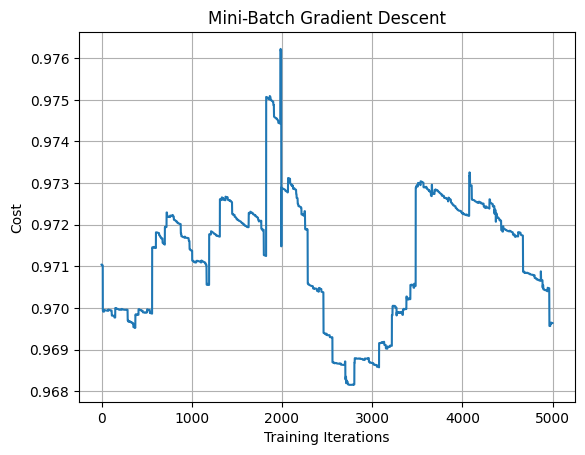

In [22]:


plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mini-Batch Gradient Descent')




**Gradient descent with Momentum**

We learned how momentum helps us to reduce oscillations in the gradient steps and attain the convergence faster. The update equation of momentum is given as:

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta) \
$$

$$
\theta = \theta - v_t \
$$


In [23]:
def Momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):

    loss = []

    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])


    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #Update vt by equation (8)
        vt = gamma * vt + lr * gradients

        #update model parameter theta by equation (9)
        theta = theta - vt

        #store loss of every iteration
        loss.append(loss_function(data,theta))

    return loss




Perform gradient descent with mometum and compute loss:


In [24]:


theta = np.zeros(2)
loss = Momentum(data, theta)



Text(0.5, 1.0, 'Mometum')

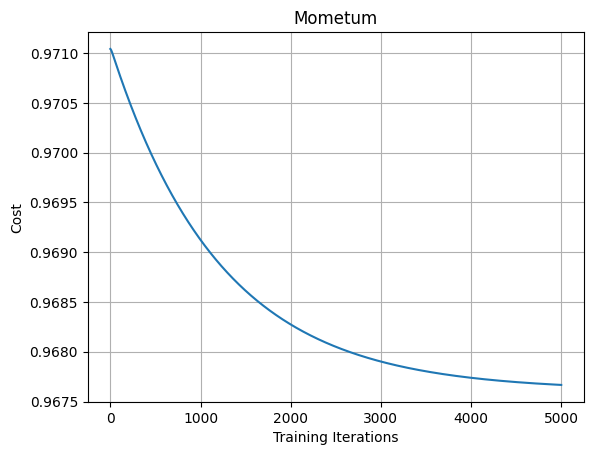

In [25]:


plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mometum')




**Nesterov Accelerated Gradients**

Refer the NAG section in the book for the detailed explanation.

The update equation of NAG is given as:

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta - \gamma v_{t-1}) \
$$

Update theta by:

$$
\theta = \theta - v_t \
$$


In [27]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):

    loss = []

    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respet to (theta-gamma*vt-1)
        gradients = compute_gradients(data, theta - gamma * vt)

        #update vt by equation
        vt = gamma * vt + lr * gradients

        #update model parameter theta by equation
        theta = theta - vt

        loss.append(loss_function(data,theta))

    return loss


In [28]:
theta = np.zeros(2)
loss = NAG(data, theta)

Text(0, 0.5, 'Cost')

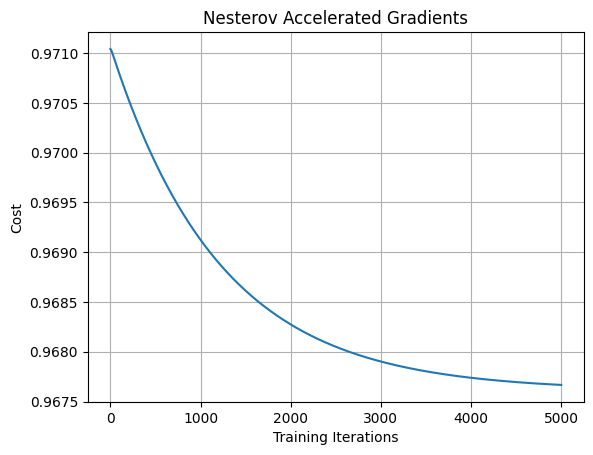

In [29]:
plt.plot(loss)
plt.grid()

plt.title('Nesterov Accelerated Gradients')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

**Set Learning rate adaptively using AdaGrad**

In a nutshell, in AdaGrad, we set the learning rate to a small value when past gradients value is high and to a high value when the past gradient value is less. So our learning rate value changes according to the past gradients updates of the parameter

$$
\theta_t^i = \theta_{t-1}^i - \frac{\eta}{\sqrt{\sum_{\tau=1}^{t} (g_\tau^i)^2 + \epsilon}} \cdot g_t^i \
$$


In [30]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 100):

    loss = []

    #initialize gradients_sum for storing sum of gradients
    gradients_sum = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute square of sum of gradients
        gradients_sum += gradients ** 2

        #update gradients
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))

        #update model parameter according to equation (12)
        theta = theta - (lr * gradient_update)

        loss.append(loss_function(data,theta))

    return loss

In [31]:


theta = np.zeros(2)
loss = AdaGrad(data, theta)



Text(0, 0.5, 'Cost')

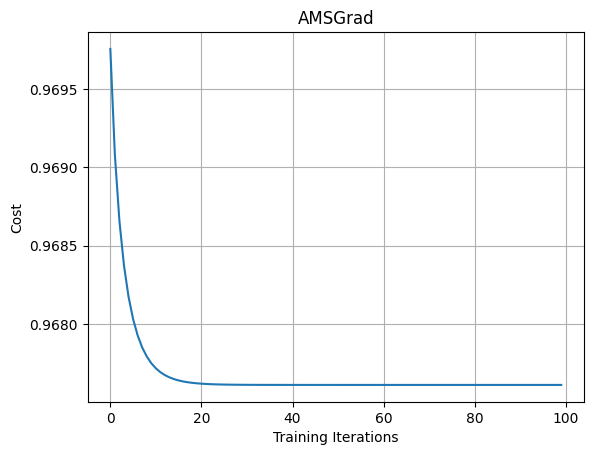

In [32]:
plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Do away with Learning Rate using Adadelta

With AdaDelta we completely get rid of learning rate.

The update equation of AdaDelta is expressed as:

---

**Running average of gradients:**

$$
E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2 \
$$

---

**Compute delta:**

$$
\nabla \theta_t = - \frac{RMS[\Delta \theta]_{t-1}}{RMS[g_t]} \cdot g_t^i \
$$

---

**Running average of parameter update:**

$$
E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1 - \gamma) \Delta \theta_t^2 \
$$

---

**Update theta:**

$$
\theta_t^i = \theta_{t-1}^i + \nabla \theta_t \
$$


In [33]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 500):

    loss = []

    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])

    #initialize running average of parameter update
    E_delta_theta2 = np.zeros(theta.shape[0])


    for t in range(num_iterations):

        #compute gradients of loss with respect to theta
        gradients = compute_gradients(data, theta)

        #compute running average of gradients as given in equation (13)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))

        #compute delta_theta as given in equation (14)
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients

        #compute running average of parameter updates as given in equation (15)
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta ** 2))

        #update the model parameter, theta as given in equation (16)
        theta = theta + delta_theta

        #store  the loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

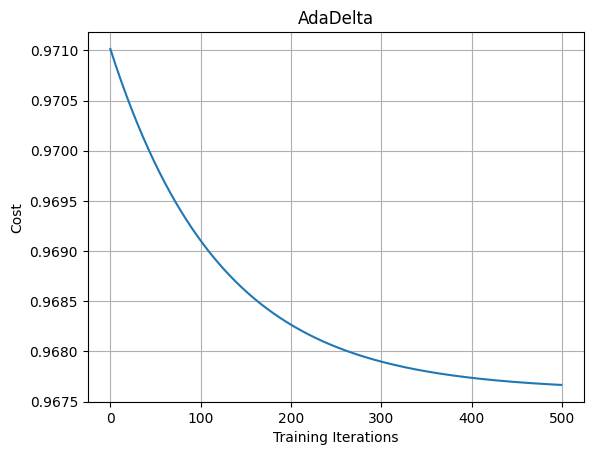

In [35]:


theta = np.zeros(2)
loss = AdaDelta(data, theta)
plt.plot(loss)
plt.grid()
plt.title('AdaDelta')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')



# Overcoming limitations of AdaGrad using RMSProp

We learned that in AdaGrad, the learning rate would become very small when the sum of gradients is high.  
So, we use RMSProp to overcome the limitations of AdaGrad.  


The update equation of RMSProp is given as:

---

**Running average of gradients:**

$$
E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2 \
$$

---

**Update theta:**

$$
\theta_t^i = \theta_{t-1}^i - \frac{\eta}{\sqrt{E[g^2]_t} + \epsilon} \cdot g_t^i \
$$


In [36]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations = 100):

    loss= []

    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute running average of gradients as given in equation (17)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))

        #update model parameter as given in equation (18)
        theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)

        #store the loss
        loss.append(loss_function(data,theta))

    return loss


Text(0, 0.5, 'Cost')

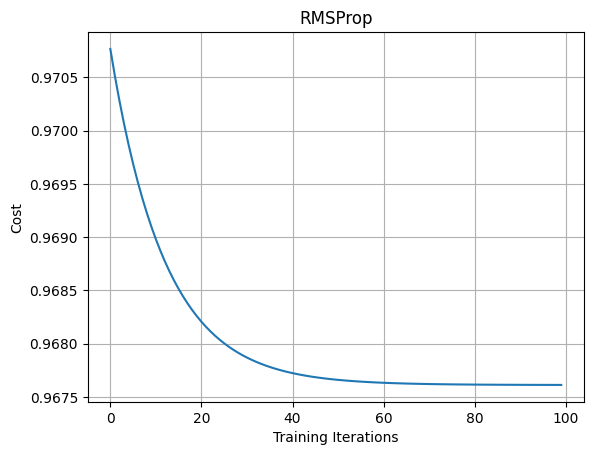

In [37]:


theta = np.zeros(2)
loss = RMSProp(data, theta)



plt.plot(loss)
plt.grid()
plt.title('RMSProp')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')



# Adam – Adaptive Moment Estimation

The update equation of Adam is given as:

---

**First moment estimate:**

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \
$$

---

**Second moment estimate:**

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \
$$

---

**Bias-corrected $m_t$:**

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t} \
$$

---

**Bias-corrected $v_t$:**

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t} \
$$

---

**Update $\theta$:**

$$
\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t \
$$


In [38]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #update first moment mt as given in equation (19)
        mt = beta1 * mt + (1. - beta1) * gradients

        #update second moment vt as given in equation (20)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2

        #compute bias-corected estimate of mt (21)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #compute bias-corrected estimate of vt (22)
        vt_hat = vt / (1. - beta2 ** (t+1))

        #update the model parameter as given in (23)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

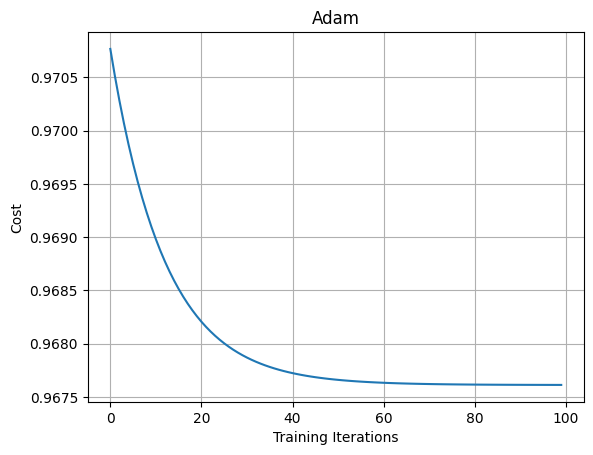

In [39]:
theta = np.zeros(2)
loss = RMSProp(data, theta)
plt.plot(loss)
plt.grid()
plt.title('Adam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')


## Adamax - Adam based on infinity norm

 The update equation of Adamax is given as:

### First moment estimate:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1)g_t \
$$

### Second moment estimate:

$$
v_t = \max(\beta_2 \cdot v_{t-1}, |g_t|) \
$$

### Bias-corrected \( m_t \):

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t} \
$$

### Update \( \theta \):

$$
\theta_t = \theta_{t-1} - \frac{\eta}{v_t} \hat{m}_t \
$$



In [40]:
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute first moment mt as given in equation (24)
        mt = beta1 * mt + (1. - beta1) * gradients

        #compute second moment vt as given in equation (25)
        vt = np.maximum(beta2 * vt, np.abs(gradients))

        #compute bias-corrected estimate of mt as given in equation (26)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #update theta as give in equation (27)
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)

        #store the loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

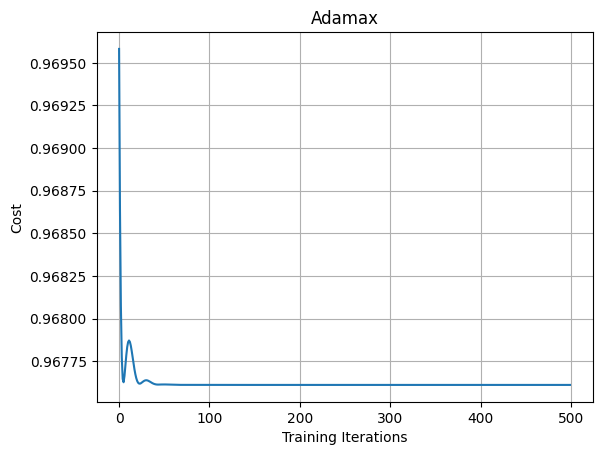

In [41]:


theta = np.zeros(2)
loss = Adamax(data, theta)

plt.plot(loss)
plt.grid()
plt.title('Adamax')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

## Adaptive Moment Estimation with AMSGrad

 The update equation of AMSGrad is given as:

### First moment estimate:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \
$$

### Second moment estimate:

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \
$$

### Updated second moment estimate:

$$
\hat{v}_t = \max(\hat{v}_{t-1}, v_t) \
$$

### Bias-corrected \( m_t \):

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t} \
$$

### Update \( \theta \):

$$
\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t \
$$


In [42]:
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 50):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    #initialize vt_hat
    vt_hat = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute first moment as given in equation (28)
        mt = beta1 * mt + (1. - beta1) * gradients

        #compute second moment as given in equation (29)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2

        #compute vt_hat as given in equation (30)
        vt_hat = np.maximum(vt_hat,vt)

        #compute bias-corrected estimate of mt as shown in equation (31)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #update model parameter theta as given in (32)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        #store loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

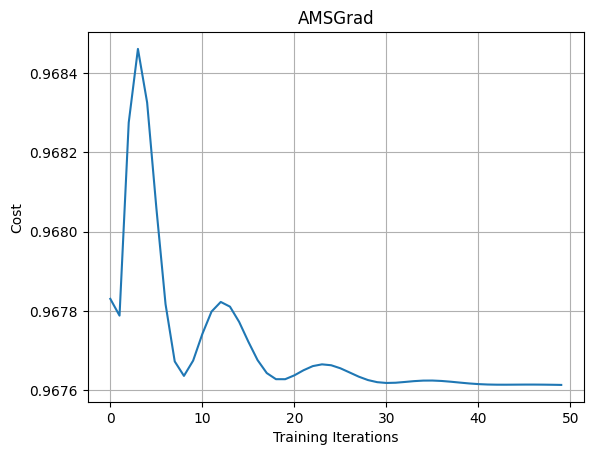

In [43]:


theta = np.zeros(2)
loss = AMSGrad(data, theta)



plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')



## Nadam - Adding NAG to ADAM

The update equation of Nadam is given as:

### First moment estimate:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \
$$

### Second moment estimate:

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \
$$

### Bias-corrected \( m_t \):

$$
\hat{m}_t = \frac{m_t}{1 - \prod_{i=1}^{t+1} \beta_1^i} \
$$

### Bias-corrected \( g_t \):

$$
\hat{g}_t = \frac{g_t}{1 - \prod_{i=1}^{t} \beta_1^i} \
$$

### Bias-corrected \( v_t \):

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t} \
$$

### Compute \( \tilde{m}_t \):

$$
\tilde{m}_t = \beta_1^{t+1} \hat{m}_t + (1 - \beta_1^t) \hat{g}_t \
$$

### Update \( \theta \):

$$
\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \tilde{m}_t \
$$


In [44]:
def Nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 50):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    beta_prod = 1

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute first moment as given in equation (33)
        mt = beta1 * mt + (1. - beta1) * gradients

        #compute second moment as given in equation (34)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        beta_prod = beta_prod * (beta1)

        #compute bias-corrected estimates of mt as shown in (35)
        mt_hat = mt / (1. - beta_prod)

        #compute bias-corrected estimate of gt as shown in (36)
        g_hat = gradients / (1. - beta_prod)

        #compute bias-corrected estimate of vt as shown in (37)
        vt_hat = vt / (1. - beta2 ** (t))

        #compute mt tilde as shown in (38)
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)

        #update theta as given in (39)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        #store the loss
        loss.append(loss_function(data,theta))

    return loss


Text(0, 0.5, 'Cost')

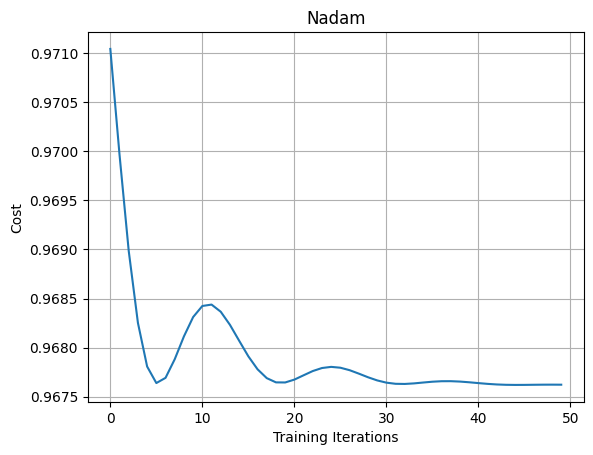

In [45]:


theta = np.zeros(2)
loss = Nadam(data, theta)

plt.plot(loss)
plt.grid()
plt.title('Nadam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')